# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import wget, os.path, zipfile, glob #get dataset
import numpy as np
import random, time
import csv 
import tensorflow as tf

def downloadDataset(download_path):
    filename = './dataset/traffic-signs-data.zip'

    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'
    if not os.path.exists(filename):
        wget.download(url, filename)
    
    if os.path.exists(filename):
        zip_ref = zipfile.ZipFile(filename, 'r')
        zip_ref.extractall(download_path)
        zip_ref.close()
    
    files = glob.glob(download_path+'*.p')
    return len(files) >= 3

def loadLabelDescription(filename):
    label_text = {}
    with open(filename, 'r') as fp:
        reader = csv.reader(fp)
        for line in reader:
            label_text[int(line[0])]=line[1]
    res = [None]*len(label_text)
    for key in label_text:
        res[key]=label_text[key]
    return res

def loadDataset(path, name):
    file = path + name + '.p'
    if os.path.exists(file):
        with open(file, mode='rb') as f:
            dataset = pickle.load(f)
        return dataset 

    
class_texts = loadLabelDescription('signnames.csv') # print(label_text)
dataset_path = './dataset/traffic-signs-data/'
downloadResult = downloadDataset(dataset_path)
assert downloadResult 

train = loadDataset(dataset_path, 'train')
valid = loadDataset(dataset_path, 'valid')
test  = loadDataset(dataset_path, 'test')

X_train_orig, y_train = train['features'], train['labels']
X_valid_orig, y_valid = valid['features'], valid['labels']
X_test_orig,  y_test  = test ['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of Training examples   : 34799
Number of Validation examples : 4410
Number of Testing examples    : 12630
Image data shape = 32x32
Number of classes = 43


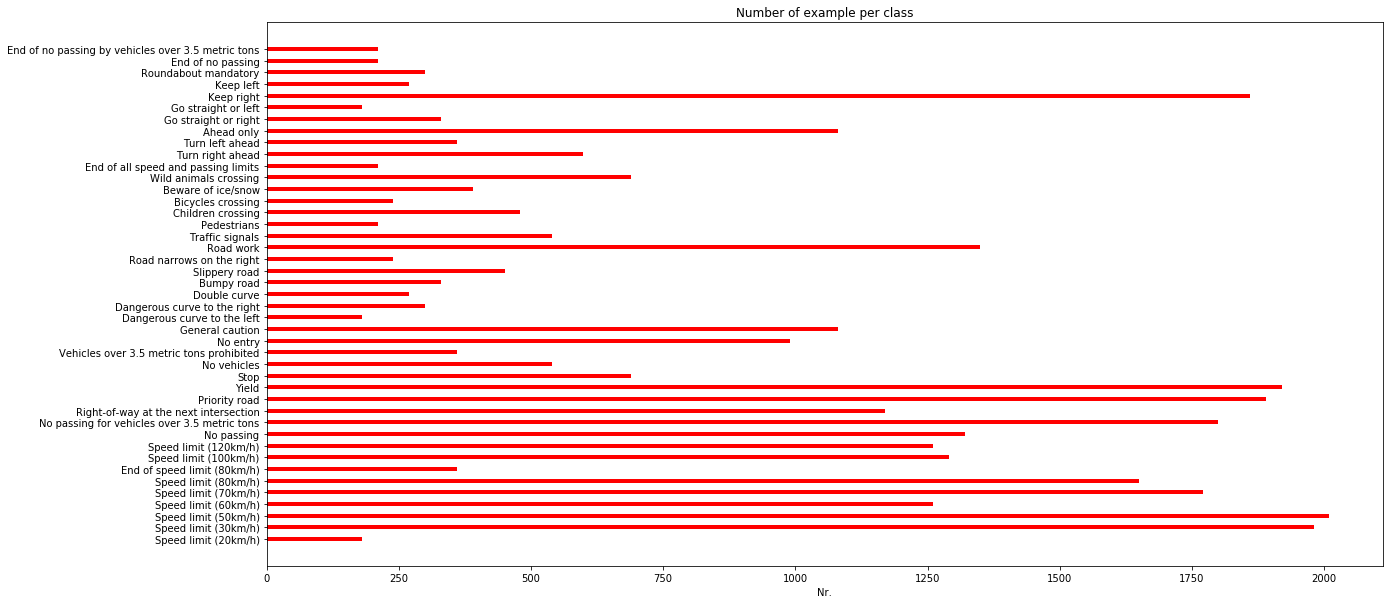

| 180 	| 0.5% 	| Speed limit (20km/h) 	
| 1980 	| 5.7% 	| Speed limit (30km/h) 	
| 2010 	| 5.8% 	| Speed limit (50km/h) 	
| 1260 	| 3.6% 	| Speed limit (60km/h) 	
| 1770 	| 5.1% 	| Speed limit (70km/h) 	
| 1650 	| 4.7% 	| Speed limit (80km/h) 	
| 360 	| 1.0% 	| End of speed limit (80km/h) 	
| 1290 	| 3.7% 	| Speed limit (100km/h) 	
| 1260 	| 3.6% 	| Speed limit (120km/h) 	
| 1320 	| 3.8% 	| No passing 	
| 1800 	| 5.2% 	| No passing for vehicles over 3.5 metric tons 	
| 1170 	| 3.4% 	| Right-of-way at the next intersection 	
| 1890 	| 5.4% 	| Priority road 	
| 1920 	| 5.5% 	| Yield 	
| 690 	| 2.0% 	| Stop 	
| 540 	| 1.6% 	| No vehicles 	
| 360 	| 1.0% 	| Vehicles over 3.5 metric tons prohibited 	
| 990 	| 2.8% 	| No entry 	
| 1080 	| 3.1% 	| General caution 	
| 180 	| 0.5% 	| Dangerous curve to the left 	
| 300 	| 0.9% 	| Dangerous curve to the right 	
| 270 	| 0.8% 	| Double curve 	
| 330 	| 0.9% 	| Bumpy road 	
| 450 	| 1.3% 	| Slippery road 	
| 240 	| 0.7% 	| Road narrows on the righ

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import matplotlib.pyplot as plt
import random,math
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Number of training examples
n_train = len(X_train_orig)

# TODO: Number of testing examples.
n_valid = len(X_valid_orig)

# TODO: Number of testing examples.
n_test = len(X_test_orig)

# TODO: What's the shape of an traffic sign image?
image_shape = str(len(X_train_orig[0]))+'x'+str(len(X_train_orig[0][0]))

# TODO: How many unique classes/labels there are in the dataset.
class_labels = np.sort(np.unique(y_train))
n_classes = len(class_labels)
class_count = [None]*n_classes
class_examples = [None]*n_classes
class_share = [float]*n_classes


print("Number of Training examples   :", n_train)
print("Number of Validation examples :", n_valid)
print("Number of Testing examples    :", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

classes_info = []
for label in class_labels:
    class_examples[label] = X_train_orig[y_train == label]
    class_count[label] = len(class_examples[label])
    class_share[label] = round(float(class_count[label]*100)/n_train,1)
    classes_info.append({
        "label": label,
        "text" : class_texts[label],
        "count": len(class_examples[label]),
    })
         
ind = np.arange(n_classes)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax= plt.subplots(figsize=(20,10))
rects1 = ax.barh(ind, class_count, width, color='r')
ax.set_xlabel('Nr.')
ax.set_title('Number of example per class')
ax.set_yticks(ind)
ax.set_yticklabels(class_texts)
plt.show()


for label in class_labels:
    print("| %d \t| %.1f%% \t| %s \t" %(class_count[label],class_share[label],class_texts[label]) )

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

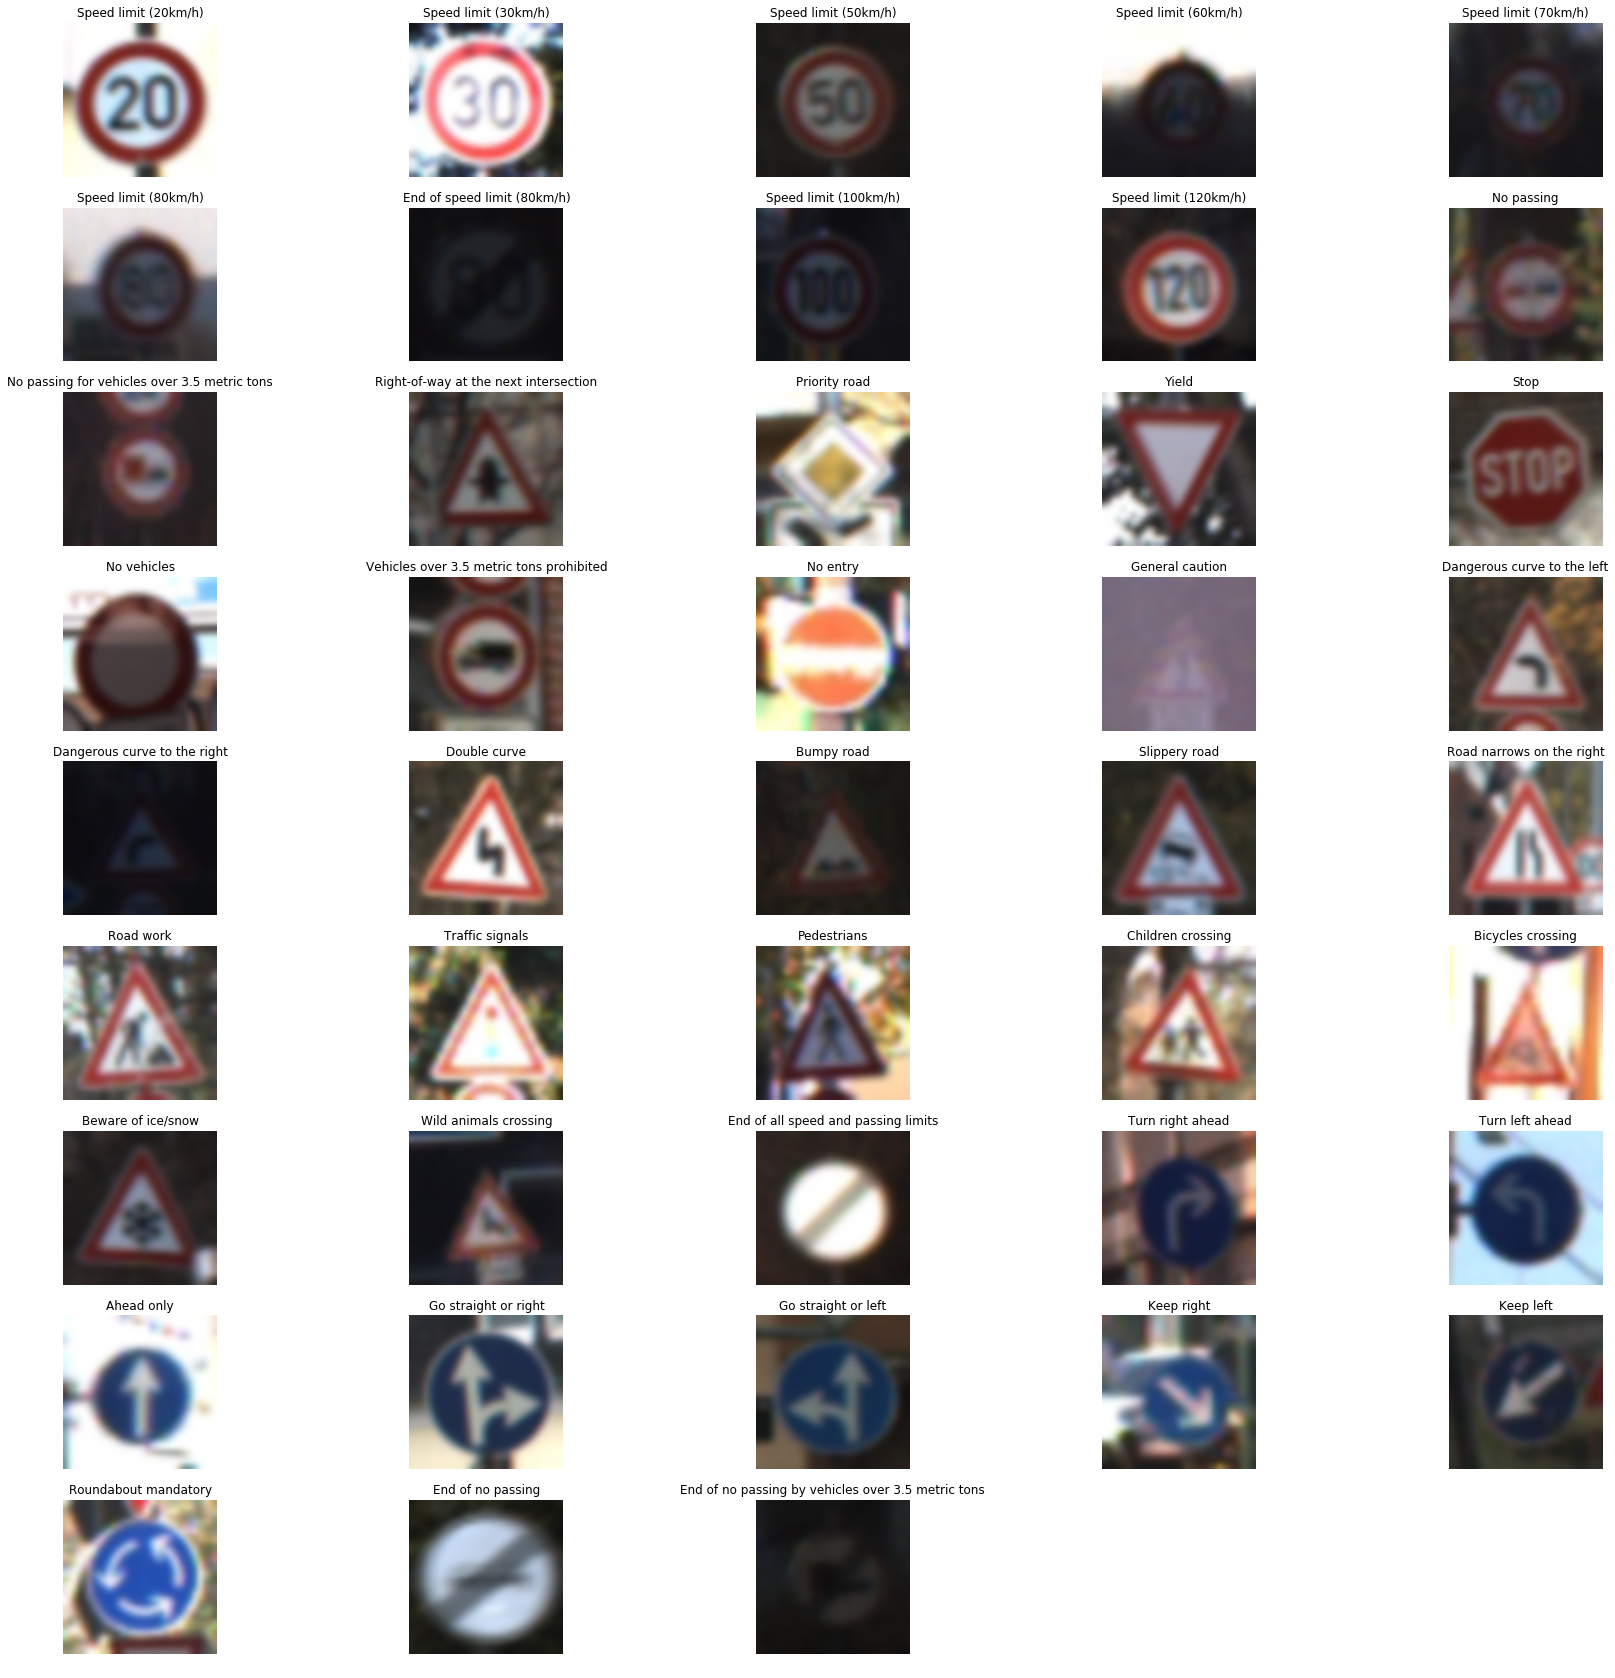

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


cols = 5

plt.figure(2, figsize=(30,30))
rows = math.ceil( n_classes / cols)
for i in range(len(class_labels)):
    label = class_labels[i]
    ax = plt.subplot(rows,cols, label+1) # sets the number of feature maps to show on each row and column
    plt.title(class_texts[i]) 
    rand_idx = math.floor(len(class_examples[label])*random.random())
    img = class_examples[label][rand_idx]
    plt.imshow(img, interpolation="bicubic" ) # expencive visual sweetener
    ax.axis('off')
            
   

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:

### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2
import os

def normalizeImage(image):
    #Homemade version of https://www.tensorflow.org/api_docs/python/tf/image/per_image_standardization
    count = np.prod(image.shape)
    mean = np.mean(image)
    std = np.std(image)
    adj_std = max(std, 1.0/np.sqrt(count))
    image = (image - mean) / adj_std
    return image


def histogramEqualization(image):
    ycrcb=cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
    channels=cv2.split(ycrcb)
    cv2.equalizeHist(channels[0],channels[0])
    cv2.merge(channels,ycrcb)
    cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR,image)
    return ycrcb

def processImage(image):
    image = histogramEqualization(image) #maybe yes, maybe no
    image = normalizeImage(image)
    return image

print("Normalizing training set")
X_train = [processImage(image) for image in X_train_orig]
print("Normalizing validation set")
X_valid = [processImage(image) for image in X_valid_orig]
print("Normalizing test set")
X_test = [processImage(image) for image in X_test_orig]




print("Shuffle train set")
X_train, y_train = shuffle(X_train, y_train)

Normalizing training set
Normalizing validation set
Normalizing test set
Shuffle train set


### Model Architecture

In [5]:
# network building functions
from tensorflow.contrib.layers import flatten

def layerShapeSize(layer):
    shape = layer.get_shape()
    size = 1
    for dim in shape:
        size *= int(dim) if str(dim) != '?' else 1
    return shape, size

def convLayer(input_layer, params, defaults):
    input_depth = int(input_layer.get_shape()[3])
    
    name         = params['name']
    ksize        = params['ksize']   if 'ksize'   in params else 3
    output_depth = params['depth']   if 'depth'   in params else input_depth
    padding      = params['padding'] if 'padding' in params else 'SAME'
    stride       = params['stride']  if 'stride'  in params else 1
    
    keep_prob    = params['keep_prob'] if 'keep_prob' in params else defaults['keep_prob'] if 'keep_prob' else 1.0 #1.0 disable by default
    mu           = params['mu']      if 'mu'      in params else defaults['mu']      if 'mu'      else 0
    sigma        = params['sigma']   if 'sigma'   in params else defaults['sigma']   if 'sigma'   else 0.1
    
    name_W = name + '_W'
    name_b = name + '_b'
    #W = tf.Variable(
    #    name_W, 
    #    (ksize, ksize, input_depth, output_depth), 
    #    dtype=tf.float32,
    #    initializer=tf.truncated_normal_initializer(mean=mu, stddev=sigma)
    #)
    #b = tf.get_variable( 
    #    name_b, 
    #    (output_depth), 
    #    dtype=tf.float32,
    #    initializer=tf.truncated_normal_initializer(mean=mu, stddev=sigma, dtype=tf.float32) 
    #) 
    
    W  = tf.Variable(tf.truncated_normal(shape=(ksize, ksize, input_depth, output_depth), mean = mu, stddev = sigma),name=name_W)
    b  = tf.Variable(tf.zeros(output_depth),name=name_b)
    
    
    tf.add_to_collection(name_W, W)
    tf.add_to_collection(name_b, b)
    
    conv = tf.nn.relu(tf.add(tf.nn.conv2d(input_layer, W, strides=[1, stride, stride, 1], padding=padding),b))
    
    layerInfo = {
        'variables':{name_W:W,name_b:b},
        'placeholders':{},
    }
    
    if keep_prob < 1:
        name_keep_prob = name+'_keep_prob'
        keep_prob = tf.placeholder(tf.float32,shape=(),name=name_keep_prob)
        tf.add_to_collection('keep_prob', keep_prob)
        layerInfo['placeholders'][name_keep_prob] = keep_prob
        conv = tf.nn.dropout(conv,keep_prob)

    return conv, params, layerInfo



def fcLayer(input_layer, params, defaults):
    input_size = int(input_layer.get_shape()[1])
    
    name         = params['name']
    size         = params['size']         if 'size' in params else input_size
    activation   = params['activation']   if 'activation' in params else True
    
    keep_prob      = params['keep_prob'] if 'keep_prob' in params else defaults['keep_prob'] if 'keep_prob' else 1.0 #1.0 disable by default
    mu           = params['mu']      if 'mu' in params else defaults['mu'] if 'mu' else 0
    sigma        = params['sigma']   if 'sigma' in params else defaults['sigma'] if 'sigma' else 0.1
    
    name_W = name + '_W'
    name_b = name + '_b'

    W  = tf.Variable(tf.truncated_normal(shape=(input_size, size), mean = mu, stddev = sigma),name=name_W)
    b  = tf.Variable(tf.zeros(size),name=name_b)
    
    tf.add_to_collection(name_W, W)
    tf.add_to_collection(name_b, b)
    
    fc = tf.add(tf.matmul(input_layer, W),b)
    layerInfo = {'variables':{name_W:W,name_b:b}, 'placeholders':{}}
    if activation:
        fc    = tf.nn.relu(fc)
        if keep_prob < 1:
            name_keep_prob = name+'_keep_prob'
            keep_prob = tf.placeholder(tf.float32,shape=(),name=name_keep_prob)
            tf.add_to_collection('keep_prob', keep_prob)
            layerInfo['placeholders'][name_keep_prob]=keep_prob
            fc = tf.nn.dropout(fc,keep_prob)
    
    return fc, params, layerInfo

def poolLayer(input_layer, params, defaults):
    ksize   = params['ksize']   if 'ksize'   in params else 2
    stride  = params['stride']  if 'stride'  in params else ksize
    padding = params['padding'] if 'padding' in params else 'SAME'
    pool = tf.nn.max_pool(input_layer, ksize=[1, ksize, ksize, 1], strides=[1, stride, stride, 1], padding=padding)
    layerInfo = {'variables':{}, 'placeholders':{}}
    return pool, params, layerInfo

def poolDepthLayer(input_layer, params, defaults):
    ksize   = params['ksize']   if 'ksize'   in params else 2
    stride  = params['stride']  if 'stride'  in params else ksize
    padding = params['padding'] if 'padding' in params else 'SAME'
    pool = tf.nn.max_pool(input_layer, ksize=[1, 1, 1, stride], strides=[1, 1, 1, ksize], padding=padding)
    layerInfo = {'variables':{}, 'placeholders':{}}
    return pool, params, layerInfo

def flatLayer(input_layer,params, defaults):
    flat = flatten(input_layer)
    layerInfo = {'variables':{}, 'placeholders':{}}
    return flat, params, layerInfo



def BuildNet(x,hyperparams):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    network_size = 0
    layer_count = 0
    top_layer = x
    modelParam = {}
    modelInfo = {}
    
    
    
    name_str = 'input'.ljust(10)
    shape, layer_size = layerShapeSize(top_layer)
    print(name_str,':\t',shape,'\t', layer_size)
    
    layer_builder = {
        'conv'       : convLayer,
        'pool'       : poolLayer,
        'pool-depth' : poolDepthLayer,
        #'repeat'     : repeatLayer,
        #'concat'     : concatLayer,
        'flat'       : flatLayer,
        'fc'         : fcLayer,
    }
    
    defaults = hyperparams['defaults']
    
    for layerParams in hyperparams['model']:
        kind = layerParams['kind']
        layerParams['name'] = layerParams['name'] if 'name' in layerParams else "%d_%s" % (layer_count, kind)
        name = layerParams['name']

        if kind not in layer_builder: raise ValueError('Unknown Layer kind: ' + kind)
        top_layer, layerParams, layerInfo = layer_builder[kind](top_layer, layerParams, defaults) 
        tf.add_to_collection('layer_'+name, top_layer)
        layerInfo['layer'] = top_layer
        modelParam[name] = layerParams
        modelInfo[name] = layerInfo

        name_str = name.ljust(10)
        shape, layer_size = layerShapeSize(top_layer)
        print(name_str,':\t',shape,'\t', layer_size)
        network_size += layer_size

        layer_count += 1
    
    return top_layer, modelParam, modelInfo


def evaluate(batch_size, accuracy_operation, x, y, X_data, y_data, feed_dict={}):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        feed_dict.update({x: batch_x, y: batch_y})
        accuracy = sess.run(accuracy_operation, feed_dict=feed_dict)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [6]:
import pprint, datetime, time
from htmltoolkit import HtmlToolkit 
import trafficsignutils as utils





def runTraining(hyperparams,train,valid,test):
    tf.reset_default_graph()
    #output tools
    pp = pprint.PrettyPrinter()
    htk = HtmlToolkit()
    js = htk.js
    jQuery = htk.jQuery
    
    #unpack datasets
    X_train, y_train = train
    X_valid, y_valid = valid
    X_test, y_test = test
    
    #unpack global parameters
    n_classes = hyperparams['n_classes']
    epochs = hyperparams['epochs']
    batch_size = hyperparams['batch_size']
    rate = hyperparams['rate']
    rate_step = hyperparams['rate_step']
    rate_change_limit = hyperparams['rate_change_limit'] 
    
    #define model name and storage folder
    basedir = './checkpoints/'
    filename = datetime.datetime.now().strftime('%Y%m%d-%H%M%S') #save the current model into todays run
    modeldir = basedir + filename+'/'
    os.mkdir(modeldir)
    info_name = modeldir + 'info-' +filename
    model_name = modeldir + 'model-' +filename
    print('Checkpoint: ', modeldir)
    
    #define inputs
    learning_rate = tf.placeholder(tf.float32,shape=(),name="learning_rate")
        
    #define inputs
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)
    
    #build net
    logits, modelParams, modelInfo = BuildNet(x,hyperparams)
    
    
    #define operations
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss_operation)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    wrong_prediction = tf.not_equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    tf.add_to_collection('accuracy_operation', accuracy_operation)
    tf.add_to_collection('correct_prediction', correct_prediction)
    tf.add_to_collection('wrong_prediction', wrong_prediction)
    
    #build feed_dict for tran and evauate (*_keep_prob)
    var_list = {}
    feed_dict_train = {}
    feed_dict_evaluate = {}
    for layerName in modelInfo:
        layerInfo = modelInfo[layerName]        
        var_list.update(layerInfo['variables'])
            
        for name in layerInfo['placeholders']:
            if name.endswith('_keep_prob'):
                #print(layerName,name)
                plc = layerInfo['placeholders'][name]
                layerParam = modelParams[layerName]
                keep_prob = layerParam['keep_prob'] if 'keep_prob' in layerParam else hyperparams['defaults']['keep_prob']
                feed_dict_train[plc] = float(keep_prob)
                feed_dict_evaluate[plc] = 1.0
            else:
                print('Trovato placeholder non gestito :(',name)
    feed_dict_train[learning_rate] = rate #add learning rate to train feed_dict only
    
    #print(feed_dict_train)
    #print(feed_dict_evaluate)
    
    tf.add_to_collection('logits', logits)
    tf.add_to_collection('x', x)
    tf.add_to_collection('y', y)
    
    
    #save current configuration before running, just in case...
    utils.saveModelInfo(info_name,0,hyperparams,0,0)
    saver = tf.train.Saver(var_list)
    
    start = time.time()
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        time_history = []
        accuracy_history = []
        accuracy_avg5_history = []
        accuracy_diff_history = []
        accuracy_rate_history = []
        print()
        print('Current configuration:')
        pp.pprint(hyperparams)
        print()
        print("Training...")
        
        labels = [[
            'Epoch',
            'Rate',
            'Acc Train',
            'Acc. Valid',
            'Acc. Avg Last 5',
            'Δ Acc. ',
            'Δ Total',
            'Δ Last 5',
            'Avg Δ Last 5 ',
            'Train',
            'Save',
            #'GPU RAM'
        ]]
        table = htk.htmlTable(labels,{'id':'epoch-table'})
        htk.printHTML(table)
        
        last_epoch_changed = 0
        rate_changed = ' '
        for i in range(epochs):
            angle = 0
            start_epoch = time.time()
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                feed_dict_train.update({x: batch_x, y: batch_y})
                sess.run(training_operation, feed_dict=feed_dict_train)

            memTotal,memFree,memFull=[0,0,0] #memInfo()
            #print("Total:{:d}, Free: {:d}, Full: {:d}".format(memTotal,memFree,memFull))
            
            #may show underfitting
            train_acc_every = 5
            if i % train_acc_every == 0:
                train_accuracy = evaluate(batch_size, accuracy_operation, x, y, X_train, y_train, feed_dict_evaluate)
            else:
                train_accuracy = 0
            validation_accuracy = evaluate(batch_size, accuracy_operation, x, y, X_valid, y_valid, feed_dict_evaluate)
            #print(evaluate(X_valid, y_valid))

            delta_epoch = time.time()-start_epoch
            delta_all = time.time()-start

            time_history.append(delta_epoch)
            accuracy_history.append(validation_accuracy)
 
            accuracy_diff = accuracy_history[i]-accuracy_history[i-1] if i > 0 else 0
            accuracy_rate = (accuracy_diff*100)/accuracy_history[i]

            accuracy_diff_history.append(accuracy_diff)
            accuracy_rate_history.append(accuracy_rate)

            last_count = 5
            lastN = []
            if i > 0:
                capped = accuracy_rate_history[1:]
                lastN = capped[-min(i,5):]

            lastN = lastN if len(lastN)>0 else [0]
            avgN = np.average(lastN)

            avgN_acc = np.average(accuracy_history[-5:])
            accuracy_avg5_history.append(avgN_acc)

            delta_save = '-'
            save_every = 4
            if (i+1) % save_every == 1 or i == epochs-1: # save the first run, the last and every 'save_every'
                start_save = time.time()
                utils.saveModelInfo(info_name,i,hyperparams,time_history,accuracy_history)
                saver.save(sess, model_name)
                delta_save = time.time() - start_save
                delta_save = str(round(delta_save))+'s'

            new_rate = rate
            if i > last_epoch_changed+last_count:
                if avgN < rate_change_limit:
                    new_rate *= rate_step
                    feed_dict_train[learning_rate] = rate
                    rate_changed = '▼' #'☹'
                    last_epoch_changed = i
                else:
                    rate_changed = ' '
            else:
                rate_changed = '🔒'
                
            lineValues =(
                "{:d}".format(i+1),
                "10^{:d}{}".format( int(np.log10(rate)), rate_changed ),
                "{:.3f}".format( train_accuracy ) if train_accuracy != 0 else '-',
                "{:.3f}".format( validation_accuracy ),
                "{:.3f}".format( avgN_acc ),
                "{:+.3f}".format( accuracy_diff ),
                "{:+.3f}".format( np.sum(accuracy_diff_history) ),
                "{:+.3f}%".format( accuracy_rate ),
                "{:+.3f}%".format( avgN ),
                "{:.1f}s".format( delta_epoch ),
                "{}".format( delta_save ),
                #'{:d} ({:d}%)'.format( memFull, ((memFull*100)/memTotal) if memTotal >0 else 0 )
            ) 
            row = htk.htmlTableRow(lineValues,{'id':'epoch_'+str(i+1)})
            jQuery("#epoch-table").append(row)

            

            rate = new_rate
            

        print("trainig finished")
        train_accuracy          = evaluate(batch_size, accuracy_operation, x, y, X_train, y_train, feed_dict_evaluate)
        validation_accuracy     = evaluate(batch_size, accuracy_operation, x, y, X_valid, y_valid, feed_dict_evaluate)
        test_accuracy           = evaluate(batch_size, accuracy_operation, x, y, X_test,  y_test,  feed_dict_evaluate)
        print("Train: {}\nValidation: {}\nTest: {}".format(train_accuracy,validation_accuracy,test_accuracy))
        

    
    
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
# parameters section


    hyperparams ={
        "epochs": 60,
        "batch_size": 32,

        'rate': 0.001, #starting rate
        'rate_step': 0.1, #between 0 and 1 to make it decrease over time. Set to 1 to disable it.
        'rate_change_limit': 0.001, #currently last5 avg5

        "n_classes": n_classes,
        "defaults":{
            "mu": 0,
            "sigma": 0.1,
            "keep_prob": 0.8,
        },

        "model": [
            { "kind": "conv", "depth": 10 },
            { "kind": "conv", "depth": 20 },
            { "kind": "pool", "padding": "VALID" },
            { "kind": "conv", "depth": 40, "padding": "VALID" },
            { "kind": "conv", "depth": 60, "padding": "VALID" },
            { "kind": "pool", "padding": "VALID" },
            { "kind": "conv", "depth": 80, "padding": "VALID" },
            { "kind": "flat" }, 
            { "kind": "fc", "size": 600, "keep_prob": 0.6}, 
            { "kind": "fc", "size": 400, "keep_prob": 0.6},
            { "kind": "fc", "size": 200, "keep_prob": 0.6}, 
            { "kind": "fc", "size": 100, "keep_prob": 0.6}, 
            { "kind": "fc", "size": n_classes, "keep_prob": 1.0, "activation": False}

        ]
    } 


runTraining(
    hyperparams,
    ( X_train, y_train ),
    ( X_valid, y_valid ),
    ( X_test,  y_test )
);



Checkpoint:  ./checkpoints/20170407-105933/
input      :	 (?, 32, 32, 3) 	 3072
0_conv     :	 (?, 32, 32, 10) 	 10240
1_conv     :	 (?, 32, 32, 20) 	 20480
2_pool     :	 (?, 16, 16, 20) 	 5120
3_conv     :	 (?, 14, 14, 40) 	 7840
4_conv     :	 (?, 12, 12, 60) 	 8640
5_pool     :	 (?, 6, 6, 60) 	 2160
6_conv     :	 (?, 4, 4, 80) 	 1280
7_flat     :	 (?, 1280) 	 1280
8_fc       :	 (?, 600) 	 600
9_fc       :	 (?, 400) 	 400
10_fc      :	 (?, 200) 	 200
11_fc      :	 (?, 100) 	 100
12_fc      :	 (?, 43) 	 43

Current configuration:
{'batch_size': 32,
 'defaults': {'keep_prob': 0.8, 'mu': 0, 'sigma': 0.1},
 'epochs': 60,
 'model': [{'depth': 10, 'kind': 'conv', 'name': '0_conv'},
           {'depth': 20, 'kind': 'conv', 'name': '1_conv'},
           {'kind': 'pool', 'name': '2_pool', 'padding': 'VALID'},
           {'depth': 40, 'kind': 'conv', 'name': '3_conv', 'padding': 'VALID'},
           {'depth': 60, 'kind': 'conv', 'name': '4_conv', 'padding': 'VALID'},
           {'kind': 'pool', 

Epoch,Rate,Acc Train,Acc. Valid,Acc. Avg Last 5,Δ Acc.,Δ Total,Δ Last 5,Avg Δ Last 5,Train,Save


trainig finished
Train: 0.9992815885513952
Validation: 0.9897959183673469
Test: 0.9758511481073671


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [9]:
%%HTML

<style>
#pred_table{
    padding: 3;
    margin: 0;    
    width: 100%;
}

#pred_table table{
    border: none;
    width: 100%;
}

#pred_table div, #pred_table table{
    padding: 0;
    margin: 0;
}

#pred_table table tr td:nth-child(1){
    width: 130px;
}

#pred_table table tr td:nth-child(2){
    width: 40px;
}

#pred_table table tr td:nth-child(3){
    width: 300px;
}

#pred_table .img_web{
    width: 50px;
    height:50px;
}


.prob_text, .prob_bar{
    position:relative;
    top: 0px;
    left: 0px;
    float: left;
    height:20px;
}

.prob_bar {
    background-color:red;
}

.prob_text{
    width: 20px;
}

.match{
    color: green;
    font-size: 40px
}

.not_match{
    color: red;
    font-size: 20px
}

.feature_map_title{
    background-color: red;
    
}

</style>

In [15]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

import math
import matplotlib.pyplot as plt

%matplotlib inline
def outputFeatureMap(feed_dict, tf_activation, activation_min=None, activation_max=None ,plt_num=1, name="FeatureMap", cols=6):
    activation = tf_activation.eval(session=sess,feed_dict=feed_dict)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(20,5))
    rows = math.ceil( featuremaps / cols)
    for featuremap in range(featuremaps):
        
        img = activation[0,:,:, featuremap]
        ax =plt.subplot(rows,cols, featuremap+1) # sets the number of feature maps to show on each row and column
        ax.axis('off')
        plt.title(name + ' ' + str(featuremap)) # displays the feature map number
        plt.imshow(img, interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        
            


Train: 0.9992815885513952
Validation: 0.9897959183673469
Test: 0.9758511481073671
10


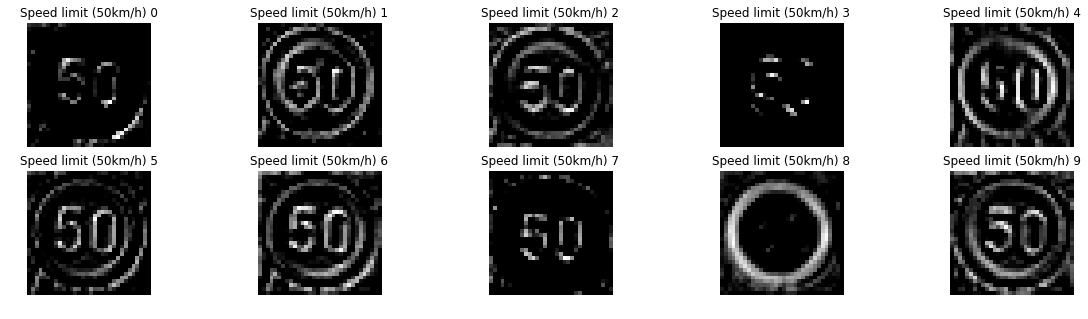

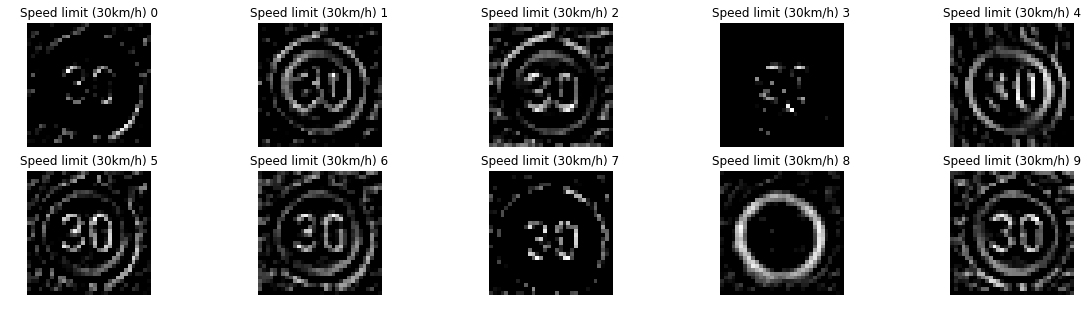

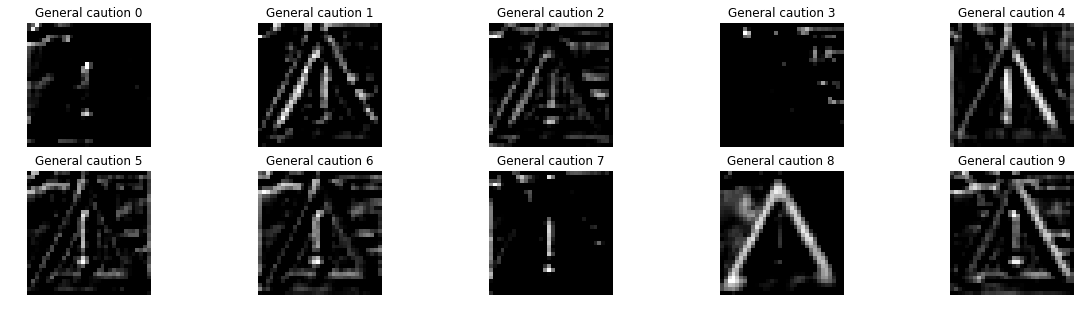

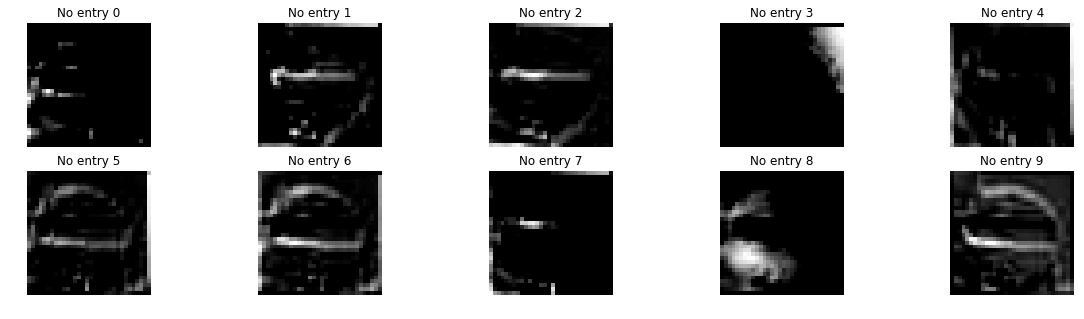

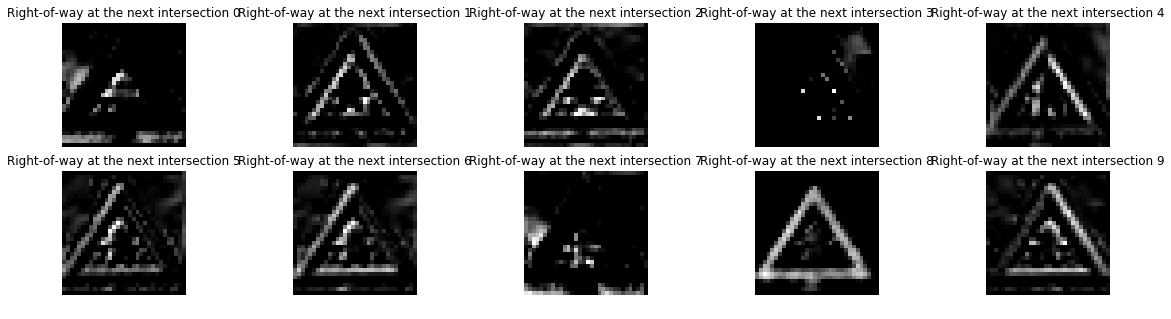

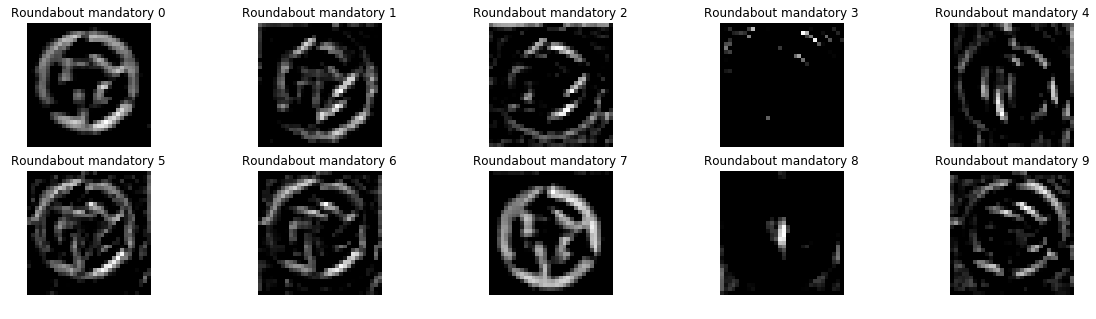

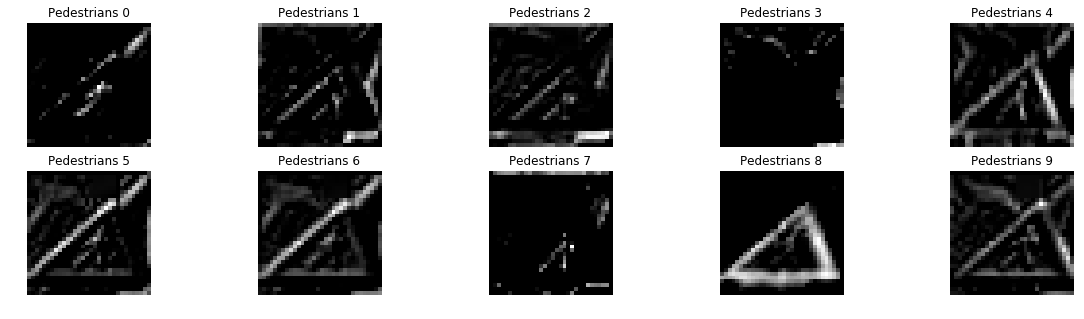

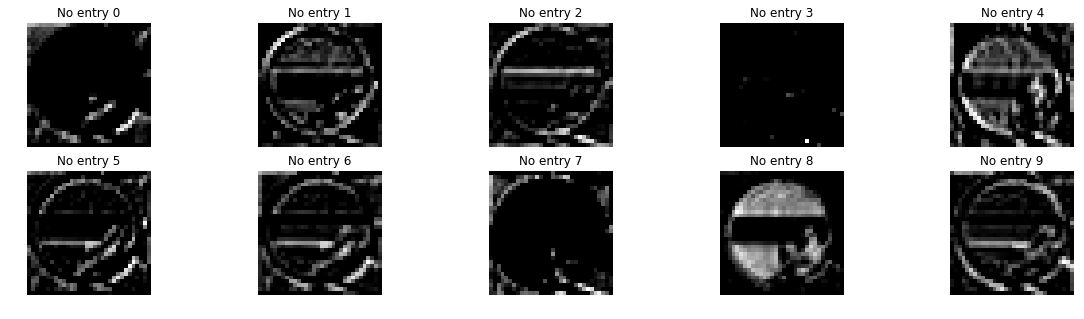

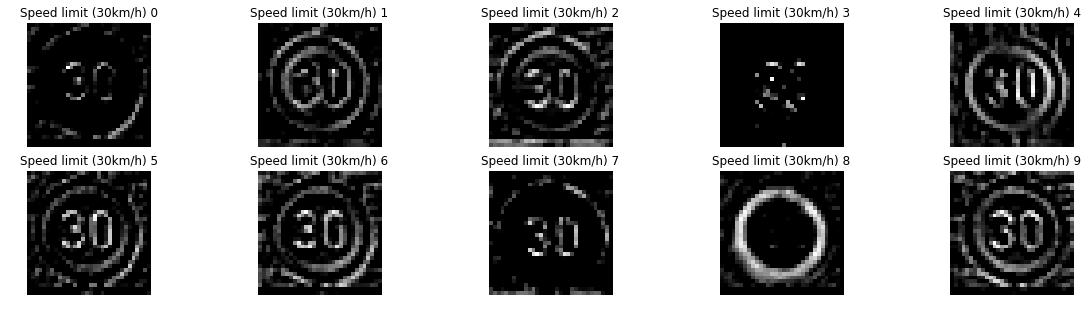

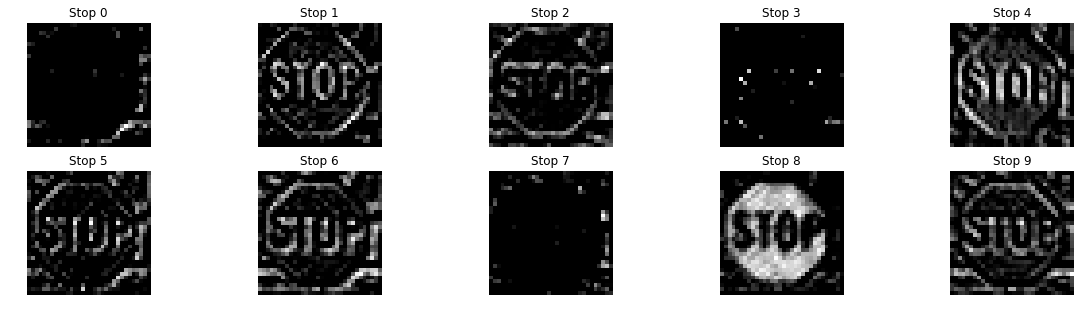

In [22]:
import cv2, glob, os.path
import tensorflow as tf
from collections import OrderedDict
from operator import itemgetter 
from htmltoolkit import HtmlToolkit 
import trafficsignutils as utils


tf.reset_default_graph()

restore_name ='20170407-105933' #load old model 
basedir = './checkpoints/'
dataset_path = './dataset/new-traffic-sign/'

htk = HtmlToolkit()
js,jQuery = htk.js, htk.jQuery

X_new = []
y_new = []
for path in glob.glob(dataset_path+'*.jpg'):
    X_new.append(cv2.imread(path,cv2.IMREAD_COLOR))
    # exctract the label number from the full path '<some-dir>/<img-num>_<label>.jpg' 
    y_new.append(int(os.path.basename(path).split('.')[0].split('_')[1])) 
n_new = len(X_new)


rows = [[{'content':'', 'attr':{'colspan':2}},'Label','Desc','Match','Predictions']]
for idx in range(n_new):
    num = str(idx)
    img = X_new[idx]
    label = y_new[idx]
    label_num = str(label)
    text = class_texts[label]
    cols = [
        num,
        htk.embedImageArray(img,{'id':'img_'+num,'class':'img_web'}),
        htk.buildTag('div',{'id':'label_'+num},label_num),
        htk.buildTag('div',{'id':'text_'+num},text),
        htk.buildTag('div',{'id':'match_'+num},'-'),
        htk.buildTag('div',{'id':'pred_'+num},'-')
    ]
    rows.append(cols)

htk.printHTML(htk.htmlTable(rows,{'id':'pred_table'}))
X_new = [processImage(image) for image in X_new]
X_new = np.array(X_new)


model_name_load = basedir + restore_name+'/model-'+restore_name
check_name_load = basedir + restore_name+'/'
info = utils.loadModelInfo(basedir,restore_name)
hyperparams = info['hyperparams']
batch_size = hyperparams['batch_size']


with tf.Session() as sess:
        #load weight & baias from the disk
    sess.run(tf.global_variables_initializer())
    
    saver = tf.train.import_meta_graph("%s.meta" % (model_name_load))
    saver.restore(sess, model_name_load)

    logits = tf.get_collection('logits')[0]
    model = tf.nn.softmax(logits)
    top5 = tf.nn.top_k(model)
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    accuracy_operation = tf.get_collection('accuracy_operation')[0]
    
    #print(logits)
    
    feed_dict = {}
    keep_prob = tf.get_collection('keep_prob')
    for t in keep_prob:
        feed_dict[t]= 2
        

    train_accuracy          = evaluate(batch_size, accuracy_operation, x, y, X_train, y_train, feed_dict)
    validation_accuracy     = evaluate(batch_size, accuracy_operation, x, y, X_valid, y_valid, feed_dict)
    test_accuracy           = evaluate(batch_size, accuracy_operation, x, y, X_test,  y_test,  feed_dict)
    print("Train: {}\nValidation: {}\nTest: {}".format(train_accuracy,validation_accuracy,test_accuracy))


        
        
    
    predictions = []
    max_bar_length = 100
    num_pred = 5
    print(len(X_new))
    for i in range(n_new):
        num = str(i)
        feed_dict.update({ x: X_new[i:i+1], y: y_new[i:i+1] })
        prob = sess.run(model, feed_dict=feed_dict)[0]
        prob_list = []
        for jk in range(len(prob)):
            prob_list.append({
                'prob':prob[jk],
                'label': jk
            });
        prob_list_sorted = sorted(prob_list, key=lambda x: x['prob'], reverse=True) 

        top5 = prob_list_sorted[:num_pred]
        predictions.append(top5)
        top5rows = []
        for item in top5:
            prob,label = item['prob'],item['label']
            text = class_texts[label]
            prob_text = max_bar_length * prob
            prob_bar = max(prob_text,0)
            top5rows.append([
                htk.buildTag('div', { 'class':'prob_bar', 'style':'width: {:.0f}px'.format(prob_bar) } ) +
                htk.buildTag('div', {'class':'prob_text'}, "{:.0f}%".format(prob_text) ),
                str(label),
                text,
            ])
        table_html = htk.htmlTable(top5rows, {'id':'pred_table_'+num})
        jQuery('#pred_'+num).html(table_html)
        
        match = y_new[i] == top5[0]['label']
        match_icon = '✓' if match else '❌'
        match_class = 'match' if match else 'not_match'
        match_html = htk.buildTag('div',{'class':match_class}, match_icon )
        jQuery('#match_'+num).html(match_html)
    
    layer = tf.get_collection('layer_0_conv')[0]
    keep_prob_conv_0= None
    for keep_prob in tf.get_collection('keep_prob'):
        if keep_prob.name.startswith('0_conv'):
            keep_prob_conv_0 = keep_prob
    
    for i in range(n_new):
        image = [X_new[i]]
        text = class_texts[y_new[i]]
        
        feed_dict={
            x : image, 
            keep_prob_conv_0: 1.0
        }
        image = outputFeatureMap(feed_dict, layer, name=text, plt_num=i, cols=5)
        



### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

By visualizing the utput of my first layer network, for all the images, it's easy to see how certain filters specialized in a specific task, like for example, that is likely activate on red background, or the filter number 4 that apparently activates in presence of slash like edges.
I would have really liked to add the visualization of the kernels for each layer, but I've never done it and I'm running out of time. 

A discussion of the following project can be found ad the following link:
https://github.com/cesare-montresor/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup.md